In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
filepath = "homo_sel.csv"
data_homo = pd.read_csv(filepath)
if 'Unnamed: 0' in data_homo.columns:
    data_homo = data_homo.drop(['Unnamed: 0'],axis=1)  

Reading data from a file.

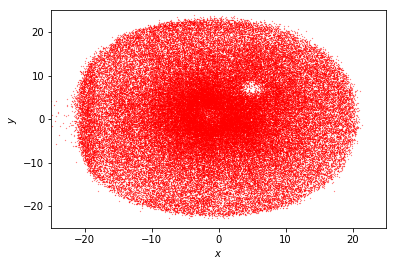

In [6]:
plt.plot(data_homo.x_pos_d, data_homo.y_pos_d, 'r.', markersize=0.4, label='hits')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.ylim(-25, 25)
plt.xlim(-25, 25)
C_h,radius_h,angle_h = np.histogram2d(data_homo['radius'],data_homo['angle'],bins=[np.arange(0,26,1),np.arange(0,365,5)])
angle_h = np.delete(angle_h,-1)
radius_h = np.delete(radius_h,-1)
angle_c = [i + 2.5 for i in angle_h]
radius_c = [i + .5 for i in radius_h]
pos_c_x = []
pos_c_y = []
C_c = []
for i in range(len(radius_c)):
    for j in range(len(angle_c)):
        pos_c_x.append(radius_c[i]*np.cos(angle_c[j]*np.pi/180))
        pos_c_y.append(radius_c[i]*np.sin(angle_c[j]*np.pi/180))
        C_c.append(C_h[i][j])
pos_c = np.stack((pos_c_x,pos_c_y),axis=-1)
#print(C_h[8])

In [15]:
xx, yy = np.meshgrid(np.linspace(-25, 25, 50),
                     np.linspace(-25, 25, 50))
pos_all = np.vstack((xx.ravel(), yy.ravel())).T
pos_x = data_homo.x_pos_d.values
pos_y = data_homo.y_pos_d.values
pos_h = np.stack((pos_x,pos_y),axis=-1)
kde_skl = KernelDensity(bandwidth=1,kernel='gaussian',leaf_size=1.5*len(pos_h)).fit(pos_h)
density_pred = np.exp(kde_skl.score_samples(pos_all))

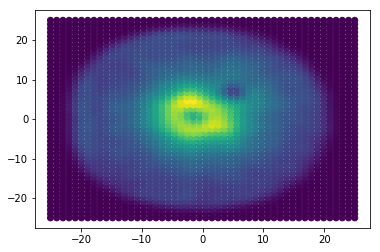

[4.59183673 0.51020408]
0.00145406009901104


In [16]:
plt.scatter(pos_all[:,0],pos_all[:,1], c=density_pred)
plt.show()
print(pos_all[1279])
print(density_pred[1279])

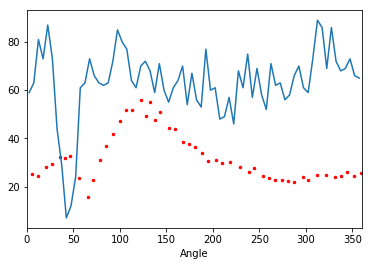

In [17]:
plt.plot(angle_c,C_h[8])
x_center = 0.909
y_center = -1.364
pos_kd = []
d_pred_f = []
pos_s =[]
for i in range(len(pos_all)):
    if pos_all[i][1]-y_center >=0:
        angle_tem = np.arctan2(pos_all[i][1]-y_center, pos_all[i][0]-x_center)*180/np.pi
    else:
        angle_tem = np.arctan2(pos_all[i][1]-y_center, pos_all[i][0]-x_center)*180/np.pi + 360
    radius_tem = np.sqrt(np.square(pos_all[i][1]-y_center)+np.square(pos_all[i][0]-x_center))
    pos_kd.append([radius_tem,angle_tem])
    if radius_tem >= 8 and radius_tem <9:
        pos_s.append(angle_tem)
        d_pred_f.append(density_pred[i]*len(data_homo)*6/(9**2-8**2))
plt.scatter(pos_s,d_pred_f,c='r',s=6)
plt.xlim(0,360)
plt.xlabel("Angle")
plt.show()

Comparison with histogram is not a good result. The densities within ring of 8-9mm don't agree with the histogram. The reason properly is bandwidth is changed when radius changes.Before fitting we need weight it with area.

(0, 360)

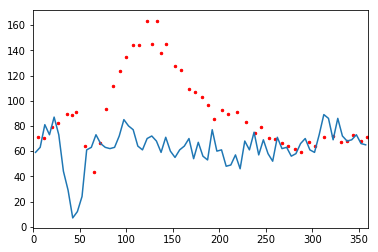

In [18]:
from sklearn.utils import resample
samples = resample(pos_h,n_samples=len(pos_h))
kde_skl = KernelDensity(bandwidth=1,kernel='gaussian').fit(samples)
density_pred = np.exp(kde_skl.score_samples(pos_all))
plt.plot(angle_c,C_h[8])
x_center = 0.909
y_center = -1.364
pos_kd = []
d_pred_f = []
pos_s =[]
for i in range(len(pos_all)):
    if pos_all[i][1]-y_center >=0:
        angle_tem = np.arctan2(pos_all[i][1]-y_center, pos_all[i][0]-x_center)*180/np.pi
    else:
        angle_tem = np.arctan2(pos_all[i][1]-y_center, pos_all[i][0]-x_center)*180/np.pi + 360
    radius_tem = np.sqrt(np.square(pos_all[i][1]-y_center)+np.square(pos_all[i][0]-x_center))
    pos_kd.append([radius_tem,angle_tem])
    if radius_tem > 8 and radius_tem <9:
        pos_s.append(angle_tem)
        d_pred_f.append(density_pred[i]*len(data_homo))
plt.scatter(pos_s,d_pred_f,c='r',s=6)
plt.xlim(0,360)

Implement the bootstrap method.